# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [3]:
# let's create a population and a sample
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rv1 = st.norm(65,5)
rv2 = st.norm(75,7)


x= np.linspace(40,100,61)
y1=rv1.pdf(x)
y2=rv2.pdf(x)


plt.figure(figsize=(8,5))
plt.plot(x,y1)
plt.plot(x,y2)

plt.show()


<Figure size 800x500 with 1 Axes>

In [4]:
c=4
# gives a list of variables in memory (all of them or only of a certain type)
%who int

print (' %who gives a list of variables in memory (all of them or only of a certain type)')
%who

c	 
 %who gives a list of variables in memory (all of them or only of a certain type)
c	 np	 plt	 rv1	 rv2	 sns	 st	 x	 y1	 
y2	 


100


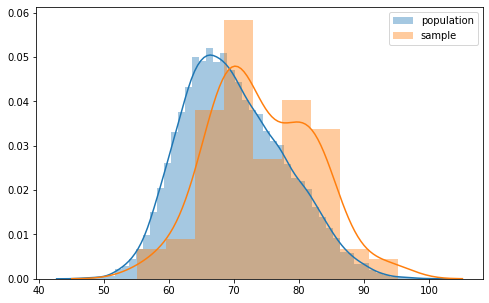

In [37]:
yy1=rv1.rvs(10000)
yy2=rv2.rvs(10000)
pop=np.concatenate((yy1,yy2),axis=None)

# pop is  the population. 20000 data points.
# we will just pretend we don't know about it for the t-test

plt.figure(figsize=(8,5))

sns.distplot (pop,label='population')


# sample:

sample=np.random.choice(pop,200)
sample=rv2.rvs(100)

print(len(sample))

sns.distplot (sample,label='sample')
plt.legend()
plt.show()

population mean and std:  70.01579538582214 7.925674961565353
sample mean and std:  74.25355470241131 7.843608951500025
degrees of freedom for t-distib:   99
critical t-value:   1.9842169515086827
t-value,p-value:   5.402818196053395 2.2638456087520353e-07
Ttest_1sampResult(statistic=5.375736230044179, pvalue=5.086803069218102e-07)


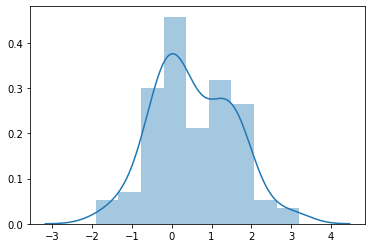

In [39]:
# One sample t-test


# Population mean 
pop_mean=pop.mean()
pop_std=pop.std()
print('population mean and std: ', pop_mean, pop_std)

# Sample mean (x̄) using NumPy mean()
x_bar=sample.mean()
sigma=sample.std()
print('sample mean and std: ', x_bar, sigma)

# Visualize sample distribution for normality 
# Does it need to be normal????
samplenew=(sample-pop_mean)/(sigma)
sns.distplot(samplenew)

# Degrees of freedom
df=len(sample)-1
print('degrees of freedom for t-distib:  ',df)

# So, at this point, we pretend we don't know the population parameters 
# and we want to know how close of the population we are with our sample

# Calculate the critical t-value
# the critical t-value is the x axis value where the cumulative probability reaches 97.5%
# ie. the probability to be above the critical value is 2.5%
t_crit = st.t.ppf(0.975,df=df)
print('critical t-value:  ',t_crit)

# Calculate the t-value and p-value
# t-value is the x axis value corresponding to the sample mean x_bar
# mu is the population mean assuming the null hypothesis
# sigma is the sample std
# The p-value is 1 minus the cumulative probability corresponding to the t-value assuming the null hyp.
t_value=(x_bar-pop_mean)/(sigma/np.sqrt(len(sample)))
p_value = 1 - st.t.cdf(x=t_value,df=df)
print('t-value,p-value:  ',t_value,p_value)

# automatic test:
results = st.ttest_1samp(a= sample, popmean= pop_mean)  
print(results)


In [20]:
def one_sample_ttest(sample, popmean, alpha):
    
    # Sample mean (x̄) using NumPy mean()
    x_bar=sample.mean()
    sigma=sample.std()
    print('sample mean and std: ', x_bar, sigma)

    # Visualize sample distribution for normality 
    # Does it need to be normal????
    samplenew=(sample-pop_mean)/(sigma)
    sns.distplot(samplenew)

    # Degrees of freedom
    df=len(sample)-1
    print('degrees of freedom for t-distib:  ',df)

    # So, at this point, we pretend we don't know the population parameters 
    # and we want to know how close of the population we are with our sample

    # Calculate the critical t-value
    # the critical t-value is the x axis value where the cumulative probability reaches 97.5%
    # ie. the probability to be above the critical value is 2.5%
    t_crit = st.t.ppf(0.975,df=df)
    print('critical t-value:  ',t_crit)

    # Calculate the t-value and p-value
    # t-value is the x axis value corresponding to the sample mean x_bar
    # mu is the population mean assuming the null hypothesis
    # sigma is the sample std
    # The p-value is 1 minus the cumulative probability corresponding to the t-value assuming the null hyp.
    t_value=(x_bar-pop_mean)/(sigma/np.sqrt(len(sample)))
    p_value = 1 - st.t.cdf(x=t_value,df=df)
    print('t-value,p-value:  ',t_value,p_value)

    # automatic test:
    results = st.ttest_1samp(a= sample, popmean= pop_mean)  
    print(results)
    
    
    
    
    # Visualize sample distribution for normality 

    
    # Population mean 

    # Sample mean (x̄) using NumPy mean()

    # Sample Standard Deviation (sigma) using Numpy
    
    # Degrees of freedom
    
    # Calculate the critical t-value
    
    # Calculate the t-value and p-value      
    
    # return results
    return None

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 